- Raya Ríos Vania Janet
- Martínez Jimenez Israel 
- Fonseca González Bruno

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

***1. Implementar los algoritmos de K-medias y K-modas desde cero***<br>

**K-medias**

In [2]:
class Kmedias: 
    """
    Descripción
    ------------
    Clase Kmedias: Función que nos permitirá encontrar los centroides de acuerdo con el valor 'k' proporcionado por el usuario,
    de un conjunto de datos. 

    Parametros
    -----------
    k (int): Numero de cluster buscados en conjunto de datos.
    max_iter (int): Numero de iterciones máximas para ajustar los centroides.
    X (array): Conjunto de datos.

    Retorno: 
    y : Lista de centroides del conjunto de datos.
    
    """

    def __init__(self, k = 3): 
        self.k = k 
        self.centroide = None

    @staticmethod
    def distancia_euclidiana(data, centroide):
        return np.sqrt(np.sum((centroide-data)**2, axis = 1))

    def fit(self, X, max_iter = 200):
        self.centroide = np.random.uniform(np.amin(X, axis = 0), np.amax(X, axis = 0),size = (self.k, X.shape[1]))
        
        for _ in range(max_iter): 
            y = []

            for dato in X:
                distancia = Kmedias.distancia_euclidiana(dato, self.centroide)
                cluster = np.argmin(distancia)
                y.append(cluster)

            y = np.array(y)

            cluster_indices = []

            for i in range(self.k):
                cluster_indices.append(np.argwhere(y == i))

            centro_cluster = []

            for i, indices in enumerate(cluster_indices):
                if len(indices) == 0:
                    centro_cluster.append(self.centroide[i])
                else: 
                    centro_cluster.append(np.mean(X[indices], axis = 0)[0])

            if np.max(self.centroide - np.array(centro_cluster)) < 0.0001:
                break
            else: 
                self.centroide = np.array(centro_cluster) 
            
        return y

    

- Verificación con conjunto de datos *xclara*

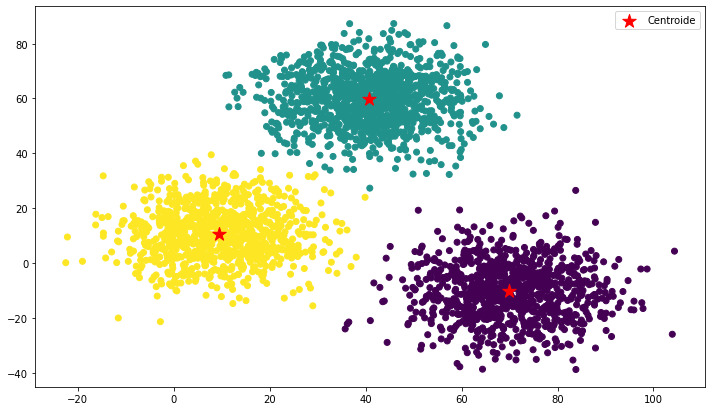

In [3]:
# Importamos datos
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/refs/heads/master/csv/cluster/xclara.csv'
data = pd.read_csv(url)
v1, v2 = data['V1'].values, data['V2'].values 

X = np.array(list(zip(v1, v2)))

# K-medias desde cero
k_medias = Kmedias(k = 3)
centroides = k_medias.fit(X)

# Graficas
plt.figure(figsize=(12, 7))
plt.scatter(v1, v2, c = centroides)
plt.scatter(k_medias.centroide[:, 0], k_medias.centroide[:, 1], c = 'red', marker='*', s = 200, label = 'Centroide')
plt.legend()
plt.show()

**K-modas**

In [4]:
class KModes:
    """
    Descripción
    ------------
    Kmodes: Clase que nos permite encontrar "k" agrupamientos de un conjunto de datos en su mayoría categóricos.

    Parametros
    -----------
    k (int): Número de agrupamientos que se desar obtener de un conjunto de datos. 
    max_iter (int): Número máximo de iteraciones para obtener los agrupamientos. 
    X (array o df) : Conjunto de datos categóricos que se desean agrupar.

    Retorno
    --------
    centroides (array): Centroides de los datos categóricos solicitados. 
    """
    def __init__(self, k, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.clusters = None
        self.centroides = None

    def fit(self, X):

        if isinstance(X, pd.DataFrame):
            X = X.values
        
        self.centroides = self.iniciar_centroides(X)
        
        for _ in range(self.max_iter):

            clusters = self.asignar_clusters(X)
            
            centroide_nuevo = self.calcular_centroides(X, clusters)
            
            if np.array_equal(self.centroides, centroide_nuevo):
                break
            
            self.centroides = centroide_nuevo
        
        self.clusters = clusters

    def predict(self, X):
        # Si X es un DataFrame, convertimos a ndarray
        if isinstance(X, pd.DataFrame):
            X = X.values
        return self.asignar_clusters(X)

    def iniciar_centroides(self, X):
        """ Inicializa los centroides seleccionando al azar k datos de X """
        random_indices = np.random.choice(X.shape[0], self.k, replace=False)
        return X[random_indices]

    def asignar_clusters(self, X):
        """ Asigna cada punto de datos al centroide más cercano """
        clusters = []
        for row in X:
            distancias = [self.diferencia_errores(row, centroid) for centroid in self.centroides]
            centroide_cercano = np.argmin(distancias)
            clusters.append(centroide_cercano)
        return clusters

    def calcular_centroides(self, X, clusters):
        """ Calcula los nuevos centroides utilizando las modas """
        centroide_nuevo = []
        for cluster in range(self.k):
            puntos_cluster = X[np.array(clusters) == cluster]
            centroid = self.calcular_moda(puntos_cluster)
            centroide_nuevo.append(centroid)
        return np.array(centroide_nuevo)

    def calcular_moda(self, puntos_cluster):
        """ Calcula la moda de cada columna del conjunto de puntos de un clúster """
        modes = []
        for col in range(puntos_cluster.shape[1]):
            values, counts = np.unique(puntos_cluster[:, col], return_counts=True)
            mode = values[np.argmax(counts)]
            modes.append(mode)
        return modes

    def diferencia_errores(self, point1, point2):
        """ Calcula la diferencia (errores totales) entre dos puntos """
        return np.sum(point1 != point2)


In [5]:
np.random.seed(42)
# Ejemplo con np.array:
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])

# Crear el modelo KModes
kmod = KModes(k=2)

# Entrenar el modelo
kmod.fit(data)

# Imprimir los centroides
print("Centroides finales:")
print(kmod.centroides)

# Predecir las etiquetas para los datos de entrada
labels = kmod.predict(data)
print("Asignaciones de clúster:")
print(labels)

Centroides finales:
[['x' 'z' 'y']
 ['z' 'y' 'x']]
Asignaciones de clúster:
[0, 0, 1, 0, 0, 1, 0, 1]


In [6]:
np.random.seed(38)
# Ejemplo con Dataframe
col_cabello = np.array(['rubio', 'castaño', 'pelirrojo', 'negro', 'castaño', 'negro', 'pelirrojo', 'rubio'])
col_ojos = np.array(['azul', 'gris', 'verde', 'café', 'azul', 'gris', 'azul', 'café'])
tipo_cabello = np.array(['lacio', 'chino', 'ondulado', 'ondulado', 'chino', 'chino', 'ondulado', 'lacio'])
personas = ['P1','P2','P3','P4','P5','P6','P7','P8']

# Crear DataFrame
data1 = pd.DataFrame({'col_cabello': col_cabello, 'col_ojos': col_ojos, 'tipo_cabello': tipo_cabello}, index=personas)

# Crear el modelo KModes
kmod1 = KModes(k=3, max_iter=200)

# Entrenar el modelo
kmod1.fit(data1)

# Predecir las etiquetas para los datos de entrada
etiquetas = kmod1.predict(data1)

# Imprimir resultados
print("Centroides finales:")
print(kmod1.centroides)

print("Asignaciones de clúster:")
print(etiquetas)

data1.insert(0, 'Etiquetas', etiquetas)
data1

Centroides finales:
[['rubio' 'café' 'lacio']
 ['pelirrojo' 'azul' 'ondulado']
 ['castaño' 'gris' 'chino']]
Asignaciones de clúster:
[0, 2, 1, 0, 2, 2, 1, 0]


,Etiquetas,col_cabello,col_ojos,tipo_cabello
P1,0,rubio,azul,lacio
P2,2,castaño,gris,chino
P3,1,pelirrojo,verde,ondulado
P4,0,negro,café,ondulado
P5,2,castaño,azul,chino
P6,2,negro,gris,chino
P7,1,pelirrojo,azul,ondulado
P8,0,rubio,café,lacio


***2. Para el agrupamiento aglomerativo:*** <br>

- Modifica los ejemplos realizados en clase utilizando las distancias *Manhattan* y *cosine* y comparar los resultados. <br>

Ejemplo de datos de productos en tiendas 

In [9]:
liga = 'https://bit.ly/2COHM14'
prod = pd.read_csv(liga)
# Preprocesamiento debido a dispersion de datos Fresh y Milk

from sklearn.preprocessing import normalize
data_scaled = normalize(prod)
data_scaled = pd.DataFrame(data_scaled, columns = prod.columns)

data_scaled.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286


### Comparación Euclidean vs Manhattan

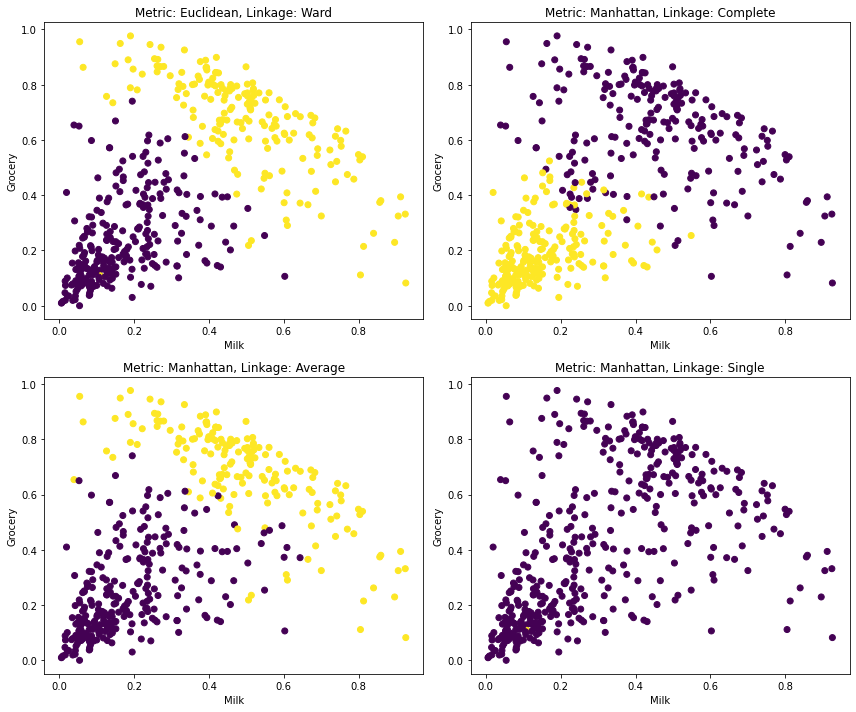

In [10]:
# Considerando 2 grupos EUCLIDEAN
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters= 2, metric = 'euclidean', linkage= 'ward')
y_hat = ac.fit_predict(data_scaled)

# Considerando 2 grupos MANHATTAN con complete
ac_man_complete = AgglomerativeClustering(n_clusters= 2, metric = 'manhattan', linkage= 'complete')
y_hat_man_c = ac_man_complete.fit_predict(data_scaled)

# Considerando 2 grupos MANHATTAN con average
ac_man_average = AgglomerativeClustering(n_clusters= 2, metric = 'manhattan', linkage= 'average')
y_hat_man_a = ac_man_average.fit_predict(data_scaled)

# Considerando 2 grupos MANHATTAN con single
ac_man_single = AgglomerativeClustering(n_clusters= 2, metric = 'manhattan', linkage= 'single')
y_hat_man_s = ac_man_single.fit_predict(data_scaled)

# Graficas 

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Primera gráfica
axs[0, 0].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat)
axs[0, 0].set_title("Metric: Euclidean, Linkage: Ward")
axs[0, 0].set_xlabel('Milk')
axs[0, 0].set_ylabel('Grocery')

# Segunda gráfica
axs[0, 1].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_man_c)
axs[0, 1].set_title("Metric: Manhattan, Linkage: Complete")
axs[0, 1].set_xlabel('Milk')
axs[0, 1].set_ylabel('Grocery')

# Tercera gráfica
axs[1, 0].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_man_a)
axs[1, 0].set_title("Metric: Manhattan, Linkage: Average")
axs[1, 0].set_xlabel('Milk')
axs[1, 0].set_ylabel('Grocery')

# Cuarta gráfica
axs[1, 1].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_man_s)
axs[1, 1].set_title("Metric: Manhattan, Linkage: Single")
axs[1, 1].set_xlabel('Milk')
axs[1, 1].set_ylabel('Grocery')

# Ajustar el espaciado entre los gráficos para que no se solapen
plt.tight_layout()

# Mostrar todas las gráficas
plt.show()

Como podemos observar, la métrica Manhattan obtiene resultados similares a "metric: wuclidean, linkage: ward" cuando utilizamos el linkage "average". <br>

Al usar el linkage "complete" podemos observar un intercambio en los agrupamientos aunque la separación mantiene una gran similitud con respecto al obtenido en "metric: euclidean, linkage: ward". <br>

Finalmente podemos observar ue al utilizar el linkage en la metrica Manhattan, no se logran distinguir los dos agrupamientos, algo muy distitnto a lo obtenido en el caso de "metric: euclidean, linkage: ward" donde si se logran disitnguir. <br>

Por tanto, usando la metrica manhattan con los linkage "average" y "complete" obtenemos resutlados similar a los obtenidos por "metric: euclidean, linkage : ward".

### Comparación Euclidean vs Cosine

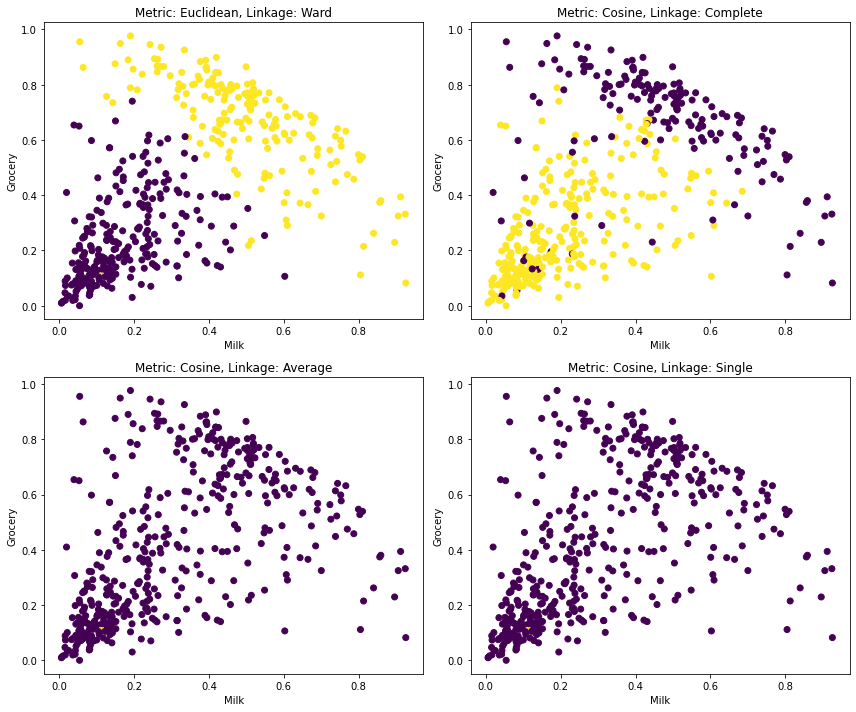

In [11]:
# Considerando 2 grupos COSINE con complete
ac_cos_complete = AgglomerativeClustering(n_clusters= 2, metric = 'cosine', linkage= 'complete')
y_hat_cos_c = ac_cos_complete.fit_predict(data_scaled)

# Considerando 2 grupos COSINE con average
ac_cos_average = AgglomerativeClustering(n_clusters= 2, metric = 'cosine', linkage= 'average')
y_hat_cos_a = ac_cos_average.fit_predict(data_scaled)

# Considerando 2 grupos COSINE con single
ac_cos_single = AgglomerativeClustering(n_clusters= 2, metric = 'cosine', linkage= 'single')
y_hat_cos_s = ac_cos_single.fit_predict(data_scaled)

# Graficas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Primera gráfica
axs[0, 0].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat)
axs[0, 0].set_title("Metric: Euclidean, Linkage: Ward")
axs[0, 0].set_xlabel('Milk')
axs[0, 0].set_ylabel('Grocery')

# Segunda gráfica
axs[0, 1].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_cos_c)
axs[0, 1].set_title("Metric: Cosine, Linkage: Complete")
axs[0, 1].set_xlabel('Milk')
axs[0, 1].set_ylabel('Grocery')

# Tercera gráfica
axs[1, 0].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_cos_a)
axs[1, 0].set_title("Metric: Cosine, Linkage: Average")
axs[1, 0].set_xlabel('Milk')
axs[1, 0].set_ylabel('Grocery')

# Cuarta gráfica
axs[1, 1].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_cos_s)
axs[1, 1].set_title("Metric: Cosine, Linkage: Single")
axs[1, 1].set_xlabel('Milk')
axs[1, 1].set_ylabel('Grocery')

# Ajustar el espaciado entre los gráficos para que no se solapen
plt.tight_layout()

# Mostrar todas las gráficas
plt.show()

Al utilizar la metrica cosine, podemos observar que únicamente cuando ocupamos el linkage "complete", obtenemos un resultado similar al de "metric: euclidean, linkage: ward", pero con la diferencia de que un grupo abarca más datos que el otro. A pesar de este hecho, podemos observar la separación en 2 agrupamientos. <br>

Sin embargo, podemos notar que al usar el linkage "average" y "single" no se distinguen dos agrupamientos, y por tanto difieren en gran medida con el obtenido en "metric: euclidean, linkage: ward". <br>

En conclusión, no se recomienda en este caso la metrica cosine, ya que a pesar de tener un caso donde se distinguen ambos agrupamientos, estos son dispersos.

**Ejemplo 2 realizado en clase: Ingresos anuales y puntuación de gastos de clientes**

In [12]:
# Importamos datos 
liga1 = 'https://bit.ly/3TUeh37'
data1 = pd.read_csv(liga1)
data1.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


### Comparación entre Euclidean y Manhattan

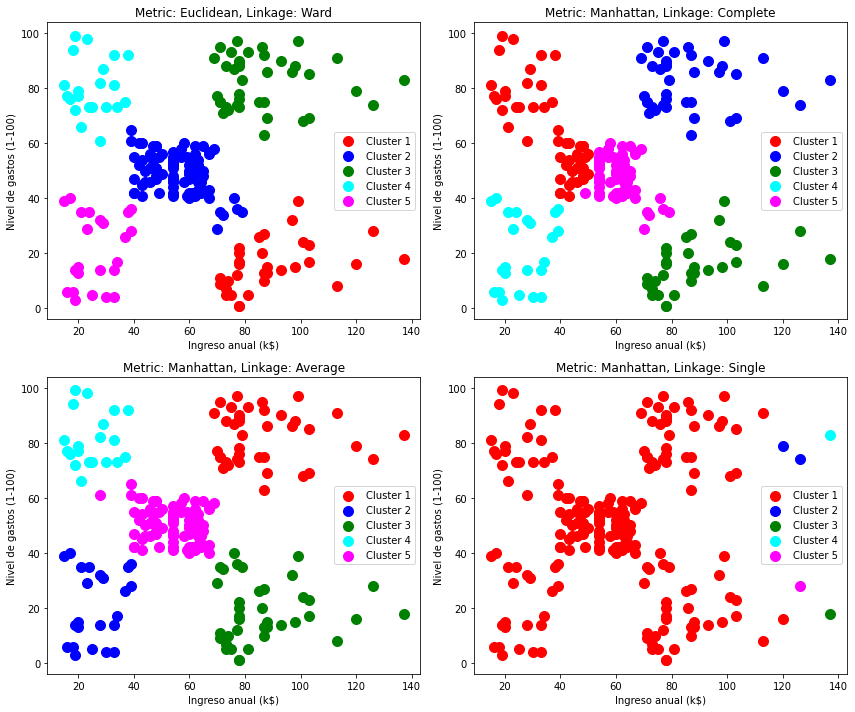

In [13]:
# Seleccionamos las columnas de interes
X = data1.iloc[:,[3, 4]].values
X[[0, 1], :]

# Relizamos un Agglomerative Clustering con 5 clusters como en clase
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters= 5, metric = 'euclidean', linkage= 'ward') 
y_hc = AC.fit_predict(X)

# Considerando Manhattan con complete
AC_man_c = AgglomerativeClustering(n_clusters= 5, metric = 'manhattan', linkage= 'complete') 
y_hc_man_c = AC_man_c.fit_predict(X)

# Considerando Manhattan con average
AC_man_a = AgglomerativeClustering(n_clusters= 5, metric = 'manhattan', linkage= 'average') 
y_hc_man_a = AC_man_a.fit_predict(X)

# Considerando Manhattan con single
AC_man_s = AgglomerativeClustering(n_clusters= 5, metric = 'manhattan', linkage= 'single') 
y_hc_man_s = AC_man_s.fit_predict(X)

# Graficamos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Primera gráfica (Euclidean, Ward)
axs[0, 0].scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[0, 0].scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[0, 0].scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[0, 0].scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[0, 0].scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[0, 0].set_title('Metric: Euclidean, Linkage: Ward')
axs[0, 0].set_xlabel('Ingreso anual (k$)')
axs[0, 0].set_ylabel('Nivel de gastos (1-100)')
axs[0, 0].legend()

# Segunda gráfica (Manhattan, Complete)
axs[0, 1].scatter(X[y_hc_man_c == 0, 0], X[y_hc_man_c == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[0, 1].scatter(X[y_hc_man_c == 1, 0], X[y_hc_man_c == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[0, 1].scatter(X[y_hc_man_c == 2, 0], X[y_hc_man_c == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[0, 1].scatter(X[y_hc_man_c == 3, 0], X[y_hc_man_c == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[0, 1].scatter(X[y_hc_man_c == 4, 0], X[y_hc_man_c == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[0, 1].set_title('Metric: Manhattan, Linkage: Complete')
axs[0, 1].set_xlabel('Ingreso anual (k$)')
axs[0, 1].set_ylabel('Nivel de gastos (1-100)')
axs[0, 1].legend()

# Tercera gráfica (Manhattan, Average)
axs[1, 0].scatter(X[y_hc_man_a == 0, 0], X[y_hc_man_a == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[1, 0].scatter(X[y_hc_man_a == 1, 0], X[y_hc_man_a == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[1, 0].scatter(X[y_hc_man_a == 2, 0], X[y_hc_man_a == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[1, 0].scatter(X[y_hc_man_a == 3, 0], X[y_hc_man_a == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[1, 0].scatter(X[y_hc_man_a == 4, 0], X[y_hc_man_a == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[1, 0].set_title('Metric: Manhattan, Linkage: Average')
axs[1, 0].set_xlabel('Ingreso anual (k$)')
axs[1, 0].set_ylabel('Nivel de gastos (1-100)')
axs[1, 0].legend()

# Cuarta gráfica (Manhattan, Single)
axs[1, 1].scatter(X[y_hc_man_s == 0, 0], X[y_hc_man_s == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[1, 1].scatter(X[y_hc_man_s == 1, 0], X[y_hc_man_s == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[1, 1].scatter(X[y_hc_man_s == 2, 0], X[y_hc_man_s == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[1, 1].scatter(X[y_hc_man_s == 3, 0], X[y_hc_man_s == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[1, 1].scatter(X[y_hc_man_s == 4, 0], X[y_hc_man_s == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[1, 1].set_title('Metric: Manhattan, Linkage: Single')
axs[1, 1].set_xlabel('Ingreso anual (k$)')
axs[1, 1].set_ylabel('Nivel de gastos (1-100)')
axs[1, 1].legend()

# Ajustar diseño
plt.tight_layout()
plt.show()

Como podemos observar, el agrupamiento que se comporta de manera similar al "metric: euclidean, linkage : ward" es el obtenido usando la metrica manhattan y el linkage "average", ya que a pesar de tener algunos nombre de agrupamientos intercambiados, el agrupamiento final es muy similar. <br>

Al utilizar el linkage "complete" podemos observar una separación extraña con respecto al Cluster 2 obtenido de "metric: euclidean, linkage : ward". Sin embargo podemos observar que sigue habiendo una separacion clara de 5 agrupamientos. <br>

Finalmente, al usar el linkage "single" este nos produce 5 agrupamientos, pero como podemos observar; uno de ellos abarca la mayoría de nuestro conjunto de datos. Por lo que difiere mucho con respecto al obtenido con "metric: euclidean, linkage : ward".<br>

En conclusión, el resultado más aceptable es el de la matrica manhattan con linkage average.

### Comparación entre Euclidean y Cosine

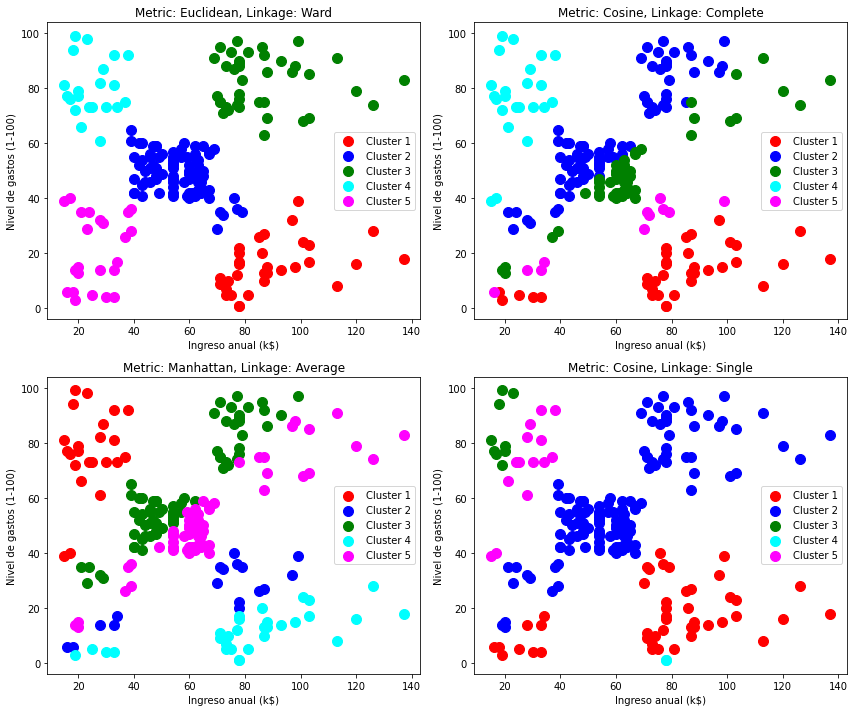

In [14]:
# Relizamos un Agglomerative Clustering con 5 clusters como en clase
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters= 5, metric = 'euclidean', linkage= 'ward') 
y_hc = AC.fit_predict(X)

# Considerando Cosine con complete
AC_cos_c = AgglomerativeClustering(n_clusters= 5, metric = 'cosine', linkage= 'complete') 
y_hc_cos_c = AC_cos_c.fit_predict(X)

# Considerando Cosine con average 
AC_cos_a = AgglomerativeClustering(n_clusters= 5, metric = 'cosine', linkage= 'average') 
y_hc_cos_a = AC_cos_a.fit_predict(X)

# Considerando Cosine con single
AC_cos_s = AgglomerativeClustering(n_clusters= 5, metric = 'cosine', linkage= 'single') 
y_hc_cos_s = AC_cos_s.fit_predict(X)

# Graficamos 
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Primera gráfica (Euclidean, Ward)
axs[0, 0].scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[0, 0].scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[0, 0].scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[0, 0].scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[0, 0].scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[0, 0].set_title('Metric: Euclidean, Linkage: Ward')
axs[0, 0].set_xlabel('Ingreso anual (k$)')
axs[0, 0].set_ylabel('Nivel de gastos (1-100)')
axs[0, 0].legend()

# Segunda gráfica (Cosine, Complete)
axs[0, 1].scatter(X[y_hc_cos_c == 0, 0], X[y_hc_cos_c == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[0, 1].scatter(X[y_hc_cos_c == 1, 0], X[y_hc_cos_c == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[0, 1].scatter(X[y_hc_cos_c == 2, 0], X[y_hc_cos_c == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[0, 1].scatter(X[y_hc_cos_c == 3, 0], X[y_hc_cos_c == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[0, 1].scatter(X[y_hc_cos_c == 4, 0], X[y_hc_cos_c == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[0, 1].set_title('Metric: Cosine, Linkage: Complete')
axs[0, 1].set_xlabel('Ingreso anual (k$)')
axs[0, 1].set_ylabel('Nivel de gastos (1-100)')
axs[0, 1].legend()

# Tercera gráfica (Cosine, Average)
axs[1, 0].scatter(X[y_hc_cos_a == 0, 0], X[y_hc_cos_a == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[1, 0].scatter(X[y_hc_cos_a == 1, 0], X[y_hc_cos_a == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[1, 0].scatter(X[y_hc_cos_a == 2, 0], X[y_hc_cos_a == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[1, 0].scatter(X[y_hc_cos_a == 3, 0], X[y_hc_cos_a == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[1, 0].scatter(X[y_hc_cos_a == 4, 0], X[y_hc_cos_a == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[1, 0].set_title('Metric: Manhattan, Linkage: Average')
axs[1, 0].set_xlabel('Ingreso anual (k$)')
axs[1, 0].set_ylabel('Nivel de gastos (1-100)')
axs[1, 0].legend()

# Cuarta gráfica (Cosine, Single)
axs[1, 1].scatter(X[y_hc_cos_s == 0, 0], X[y_hc_cos_s == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[1, 1].scatter(X[y_hc_cos_s == 1, 0], X[y_hc_cos_s == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[1, 1].scatter(X[y_hc_cos_s == 2, 0], X[y_hc_cos_s == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[1, 1].scatter(X[y_hc_cos_s == 3, 0], X[y_hc_cos_s == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[1, 1].scatter(X[y_hc_cos_s == 4, 0], X[y_hc_cos_s == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[1, 1].set_title('Metric: Cosine, Linkage: Single')
axs[1, 1].set_xlabel('Ingreso anual (k$)')
axs[1, 1].set_ylabel('Nivel de gastos (1-100)')
axs[1, 1].legend()

# Ajustar diseño
plt.tight_layout()
plt.show()

Al realizar el agrupamiento con la metrica cosine con linkage "complete" podemos notar un agrupamiento en forma de diagonal, en donde a pesar de tener 5 agrupamientos, estos no parecen estar bien "separados" los unos de los otros. <br>

Un comportamiento similar es observado al usar el linkage "average" en donde solo se intercambiar los nombres de los agrupamientos. Pero estos siguen sin mantener una separación clara entre ellos. <br>

Finalmente, all utiilizar el linkage "single" podemos observar que el Cluster 4, solo parece tener un dato de todo nuestro conjunto. Por lo que a pesar de tener 5 agrupamiento, estos no son los más adecuados y difieren mucho con respecto a los obtenidos con "metric: euclidean, linkage : ward". <br>

En conclusión, para este conjunto no se recomienda el uso de la metrica cosine.

***Modificar los ejemplos realizados en clase para usar los otros tipos de enlazamiento entre grupos (sinlge, complete, average) y comparar los resultados***

Utilizando los resultados del inciso anterior podemos obtener la comparación entre *Manhattan* y *Cosine* con sus respectivos enlazamientos. <br>

Conjunto de datos: Productos de tienda departamental

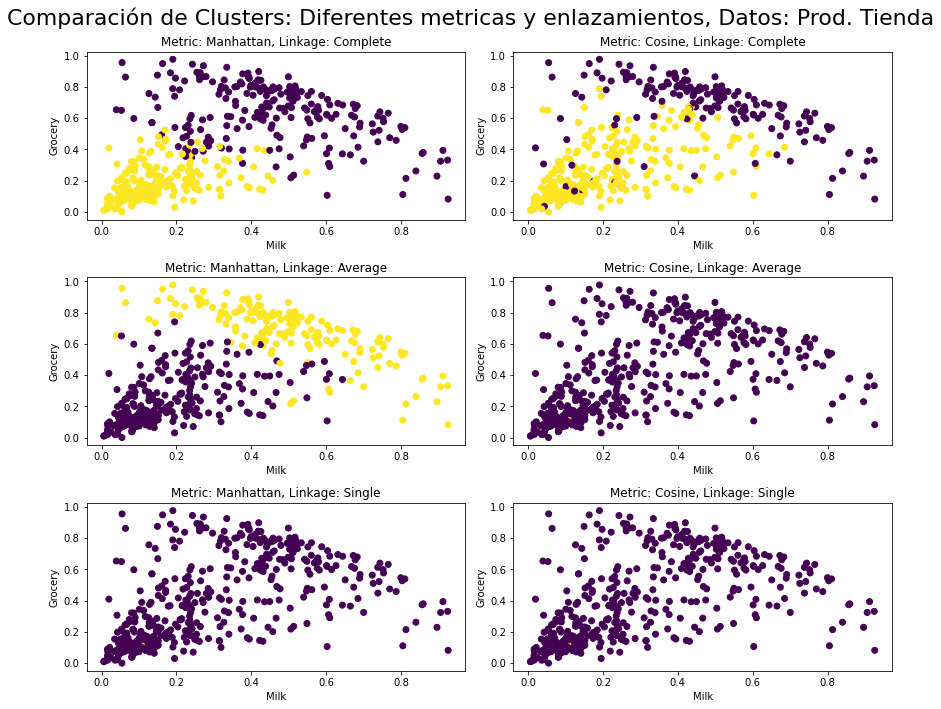

In [15]:
# Graficas 

fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs[0, 0].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_man_c)
axs[0, 0].set_title("Metric: Manhattan, Linkage: Complete")
axs[0, 0].set_xlabel('Milk')
axs[0, 0].set_ylabel('Grocery')

axs[0, 1].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_cos_c)
axs[0, 1].set_title("Metric: Cosine, Linkage: Complete")
axs[0, 1].set_xlabel('Milk')
axs[0, 1].set_ylabel('Grocery')

axs[1, 0].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_man_a)
axs[1, 0].set_title("Metric: Manhattan, Linkage: Average")
axs[1, 0].set_xlabel('Milk')
axs[1, 0].set_ylabel('Grocery')

axs[1, 1].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_cos_a)
axs[1, 1].set_title("Metric: Cosine, Linkage: Average")
axs[1, 1].set_xlabel('Milk')
axs[1, 1].set_ylabel('Grocery')

axs[2, 0].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_man_s)
axs[2, 0].set_title("Metric: Manhattan, Linkage: Single")
axs[2, 0].set_xlabel('Milk')
axs[2, 0].set_ylabel('Grocery')

axs[2, 1].scatter(data_scaled.Milk, data_scaled.Grocery, c = y_hat_cos_s)
axs[2, 1].set_title("Metric: Cosine, Linkage: Single")
axs[2, 1].set_xlabel('Milk')
axs[2, 1].set_ylabel('Grocery')

fig.suptitle('Comparación de Clusters: Diferentes metricas y enlazamientos, Datos: Prod. Tienda', fontsize=22)


# Ajustar diseño
plt.tight_layout()
plt.show()




Como podemos observar, entre los enlazamientos "complete" comparten una cierta similitud, salvo por la cantidad de datos agrupados en el agrupamiento morado, ademas que en la metrica "cosine" se nota una mayor dispersión en los datos. <br>

En el enlazamiento de average podemos observar una gran diferencia ya que en la métrica "cosine" solo se logra distinguir un agrupamiento mientras que en la metrica "manhattan" si podemos observar ambos agrupamientos. <br>

Finalmente, entre los enlazamientos "single" podemos observar un comportamiento similar, ya que en ninguno de los casos, podemos observar la distinción entre los dos agrupamientos.

Conjunto de datos: Ingresos anuales y puntuación de gastos de clientes

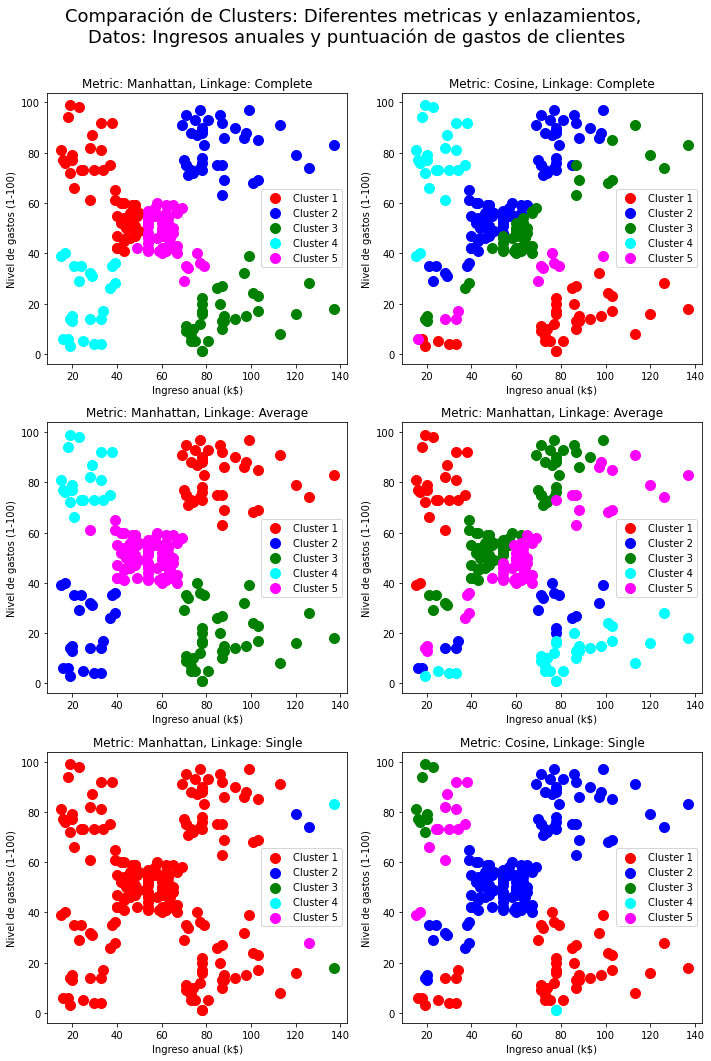

In [16]:
# Graficas 

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# Segunda gráfica (Manhattan, Complete)
axs[0, 0].scatter(X[y_hc_man_c == 0, 0], X[y_hc_man_c == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[0, 0].scatter(X[y_hc_man_c == 1, 0], X[y_hc_man_c == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[0, 0].scatter(X[y_hc_man_c == 2, 0], X[y_hc_man_c == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[0, 0].scatter(X[y_hc_man_c == 3, 0], X[y_hc_man_c == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[0, 0].scatter(X[y_hc_man_c == 4, 0], X[y_hc_man_c == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[0, 0].set_title('Metric: Manhattan, Linkage: Complete')
axs[0, 0].set_xlabel('Ingreso anual (k$)')
axs[0, 0].set_ylabel('Nivel de gastos (1-100)')
axs[0, 0].legend()

# Segunda gráfica (Cosine, Complete)
axs[0, 1].scatter(X[y_hc_cos_c == 0, 0], X[y_hc_cos_c == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[0, 1].scatter(X[y_hc_cos_c == 1, 0], X[y_hc_cos_c == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[0, 1].scatter(X[y_hc_cos_c == 2, 0], X[y_hc_cos_c == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[0, 1].scatter(X[y_hc_cos_c == 3, 0], X[y_hc_cos_c == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[0, 1].scatter(X[y_hc_cos_c == 4, 0], X[y_hc_cos_c == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[0, 1].set_title('Metric: Cosine, Linkage: Complete')
axs[0, 1].set_xlabel('Ingreso anual (k$)')
axs[0, 1].set_ylabel('Nivel de gastos (1-100)')
axs[0, 1].legend()

# Tercera gráfica (Manhattan, Average)
axs[1, 0].scatter(X[y_hc_man_a == 0, 0], X[y_hc_man_a == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[1, 0].scatter(X[y_hc_man_a == 1, 0], X[y_hc_man_a == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[1, 0].scatter(X[y_hc_man_a == 2, 0], X[y_hc_man_a == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[1, 0].scatter(X[y_hc_man_a == 3, 0], X[y_hc_man_a == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[1, 0].scatter(X[y_hc_man_a == 4, 0], X[y_hc_man_a == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[1, 0].set_title('Metric: Manhattan, Linkage: Average')
axs[1, 0].set_xlabel('Ingreso anual (k$)')
axs[1, 0].set_ylabel('Nivel de gastos (1-100)')
axs[1, 0].legend()

# Tercera gráfica (Cosine, Average)
axs[1, 1].scatter(X[y_hc_cos_a == 0, 0], X[y_hc_cos_a == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[1, 1].scatter(X[y_hc_cos_a == 1, 0], X[y_hc_cos_a == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[1, 1].scatter(X[y_hc_cos_a == 2, 0], X[y_hc_cos_a == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[1, 1].scatter(X[y_hc_cos_a == 3, 0], X[y_hc_cos_a == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[1, 1].scatter(X[y_hc_cos_a == 4, 0], X[y_hc_cos_a == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[1, 1].set_title('Metric: Manhattan, Linkage: Average')
axs[1, 1].set_xlabel('Ingreso anual (k$)')
axs[1, 1].set_ylabel('Nivel de gastos (1-100)')
axs[1, 1].legend()

# Cuarta gráfica (Manhattan, Single)
axs[2, 0].scatter(X[y_hc_man_s == 0, 0], X[y_hc_man_s == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[2, 0].scatter(X[y_hc_man_s == 1, 0], X[y_hc_man_s == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[2, 0].scatter(X[y_hc_man_s == 2, 0], X[y_hc_man_s == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[2, 0].scatter(X[y_hc_man_s == 3, 0], X[y_hc_man_s == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[2, 0].scatter(X[y_hc_man_s == 4, 0], X[y_hc_man_s == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[2, 0].set_title('Metric: Manhattan, Linkage: Single')
axs[2, 0].set_xlabel('Ingreso anual (k$)')
axs[2, 0].set_ylabel('Nivel de gastos (1-100)')
axs[2, 0].legend()

# Cuarta gráfica (Cosine, Single)
axs[2, 1].scatter(X[y_hc_cos_s == 0, 0], X[y_hc_cos_s == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
axs[2, 1].scatter(X[y_hc_cos_s == 1, 0], X[y_hc_cos_s == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
axs[2, 1].scatter(X[y_hc_cos_s == 2, 0], X[y_hc_cos_s == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
axs[2, 1].scatter(X[y_hc_cos_s == 3, 0], X[y_hc_cos_s == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
axs[2, 1].scatter(X[y_hc_cos_s == 4, 0], X[y_hc_cos_s == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
axs[2, 1].set_title('Metric: Cosine, Linkage: Single')
axs[2, 1].set_xlabel('Ingreso anual (k$)')
axs[2, 1].set_ylabel('Nivel de gastos (1-100)')
axs[2, 1].legend()


fig.suptitle('Comparación de Clusters: Diferentes metricas y enlazamientos, \nDatos: Ingresos anuales y puntuación de gastos de clientes', fontsize=18)


# Ajustar diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(top=0.9)
plt.show()



En el caso de el enlazamiento "complete" podemos observar un agrupamiento similar entre ambas métricas, con la observación de que la métrica "cosine" hace un agrupamiento en forma diagonal, lo que no produce una separación clara entre cada cluster como se observa en el caso de la métrica "manhattan". <br>

Usando el enlazamiento "average" la métrica "cosine" mantiene un comportamiento similar al enlazamiento "complete" solamente se observa un intercambio entre los clusters. Sin embargo, la métrica de "manhattan" logra un agrupamiento claro como el observado en la métrica "euclidean" y enlazamiento "ward". <br>

Finalmente, al usar el enlazamiento "single" podemos observar que la métrica "manhattan" a pesar de realizar los 5 agrupamientos, podemos observar que el Cluster 1 abarca la mayoría de los datos del conjunto. En cambio, en la métrica "cosine" se logra observar los agrupamientos de mejor forma, pero con el detalle de que el Cluster 5 parace no tener casi ningún dato. Por lo que en ambas métricas, al usar el enlazamiento "single" obtenemos resultados poco eficientes.